In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('HousePricePrediction.csv')

In [6]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [9]:
df.shape

(2919, 13)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [8]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


# Data Cleaning


In [26]:
df.drop(['Id'],
             axis=1,
             inplace=True)

In [50]:
for c in df.columns:
  df[c]=df[c].fillna(0)
  df[c].value_counts().index[0]

In [51]:
df['SalePrice']=df['SalePrice'].fillna(
  df['SalePrice'].mean())

In [57]:
df2=df.dropna()

In [58]:
df2['SalePrice'].isnull().sum()

0

In [59]:
df2['SalePrice']

,SalePrice
0,208500.00000
1,181500.00000
2,223500.00000
3,140000.00000
4,250000.00000
...,...
2914,180921.19589
2915,180921.19589
2916,180921.19589
2917,180921.19589


In [60]:
df2.shape

(2913, 12)

In [61]:
df2.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


# One Hot Encoding

In [62]:
from sklearn.preprocessing import OneHotEncoder

s = (df2.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [65]:
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') # Handle unknown categories during testing
OH_array = OH_encoder.fit_transform(df2[object_cols])
OH_cols = pd.DataFrame(OH_array)
OH_cols.index = df2.index
# Use get_feature_names_out() instead
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)
df_final = df2.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [68]:
df_final.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
df_final.shape

(2913, 38)

# EDA

<Axes: >

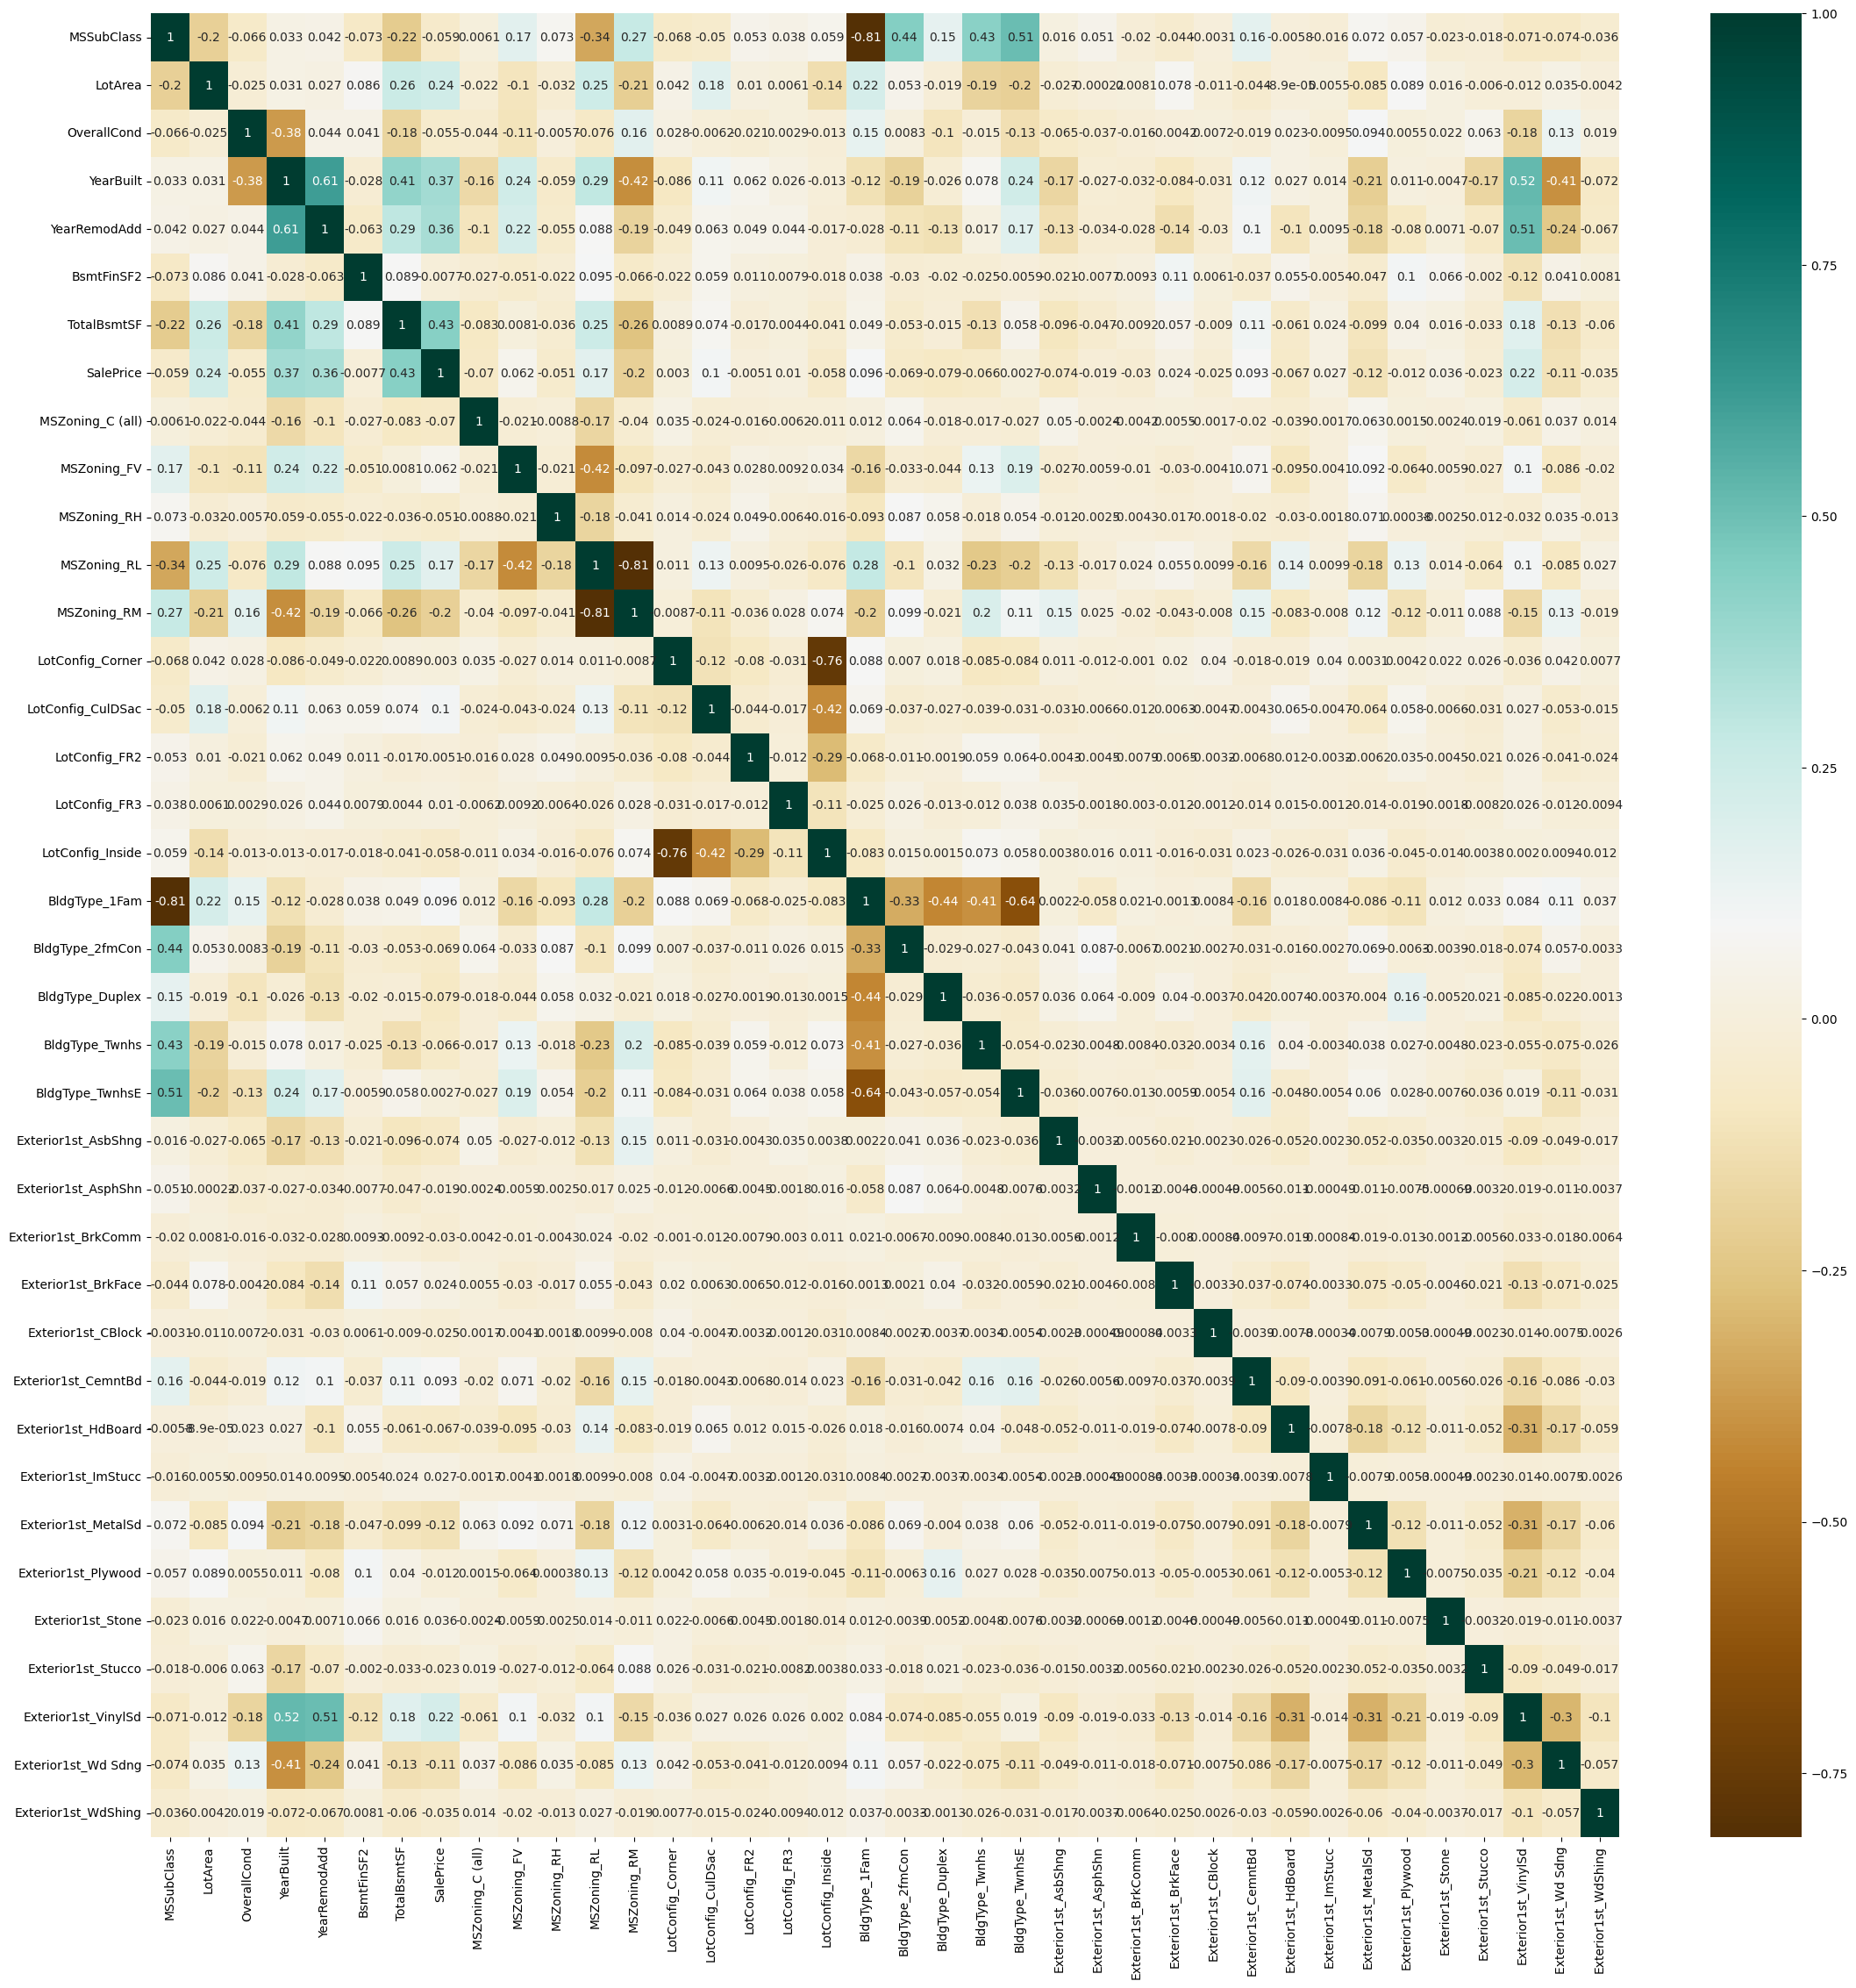

In [85]:
plt.figure(figsize=(27,27))
sns.heatmap(df_final.corr(),
			cmap = 'BrBG',

			annot = True)


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

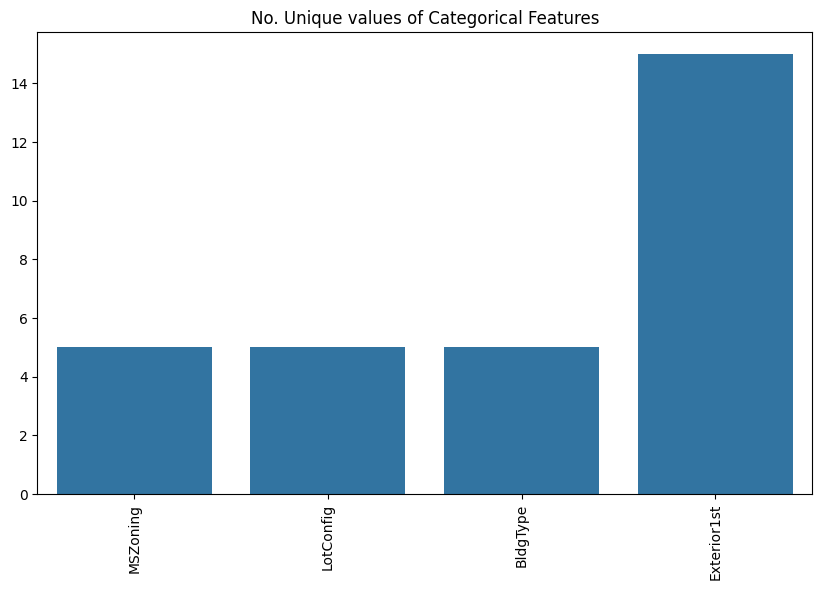

In [80]:
unique_values = []
for col in object_cols:
  unique_values.append(df2[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

<ipython-input-81-97591c68ecb4>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


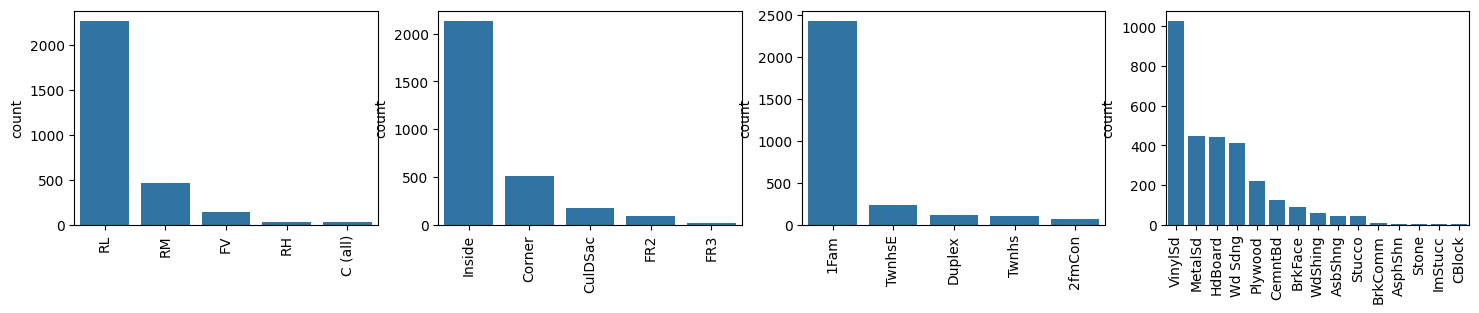

In [81]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = df2[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

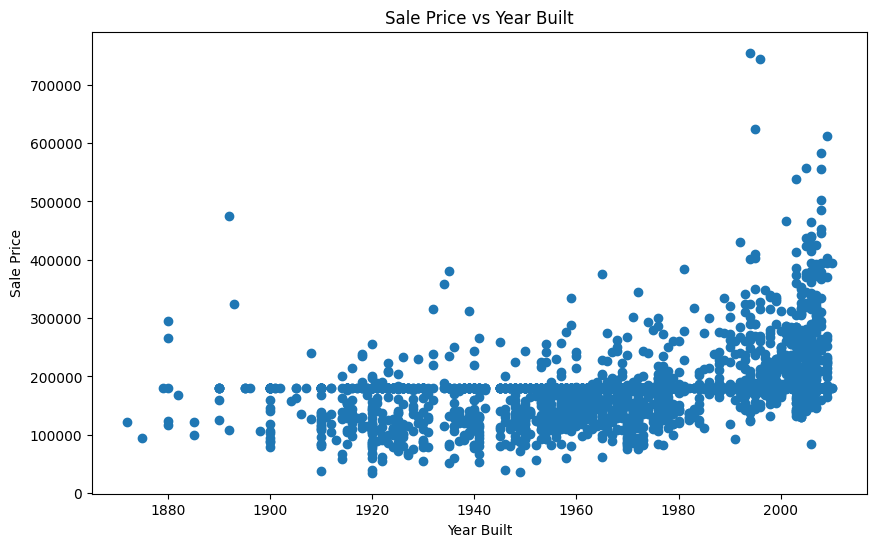

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df2['YearBuilt'], df2['SalePrice'])
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
_ = plt.title('Sale Price vs Year Built')

# Splitting the dataset

In [120]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test= train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [123]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
y_pred = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, y_pred))


0.1870512931870423


In [124]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=100)
model_RFR.fit(X_train, Y_train)
y_pred = model_RFR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, y_pred))


0.18387926299891696
